In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [207]:
x1 = np.linspace(-10, 10, num=50)
x2 = np.linspace(-30, 100, num=50)
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.reshape(2500)
x2 = x2.reshape(2500)
y = x2 < (np.power(x1, 2))

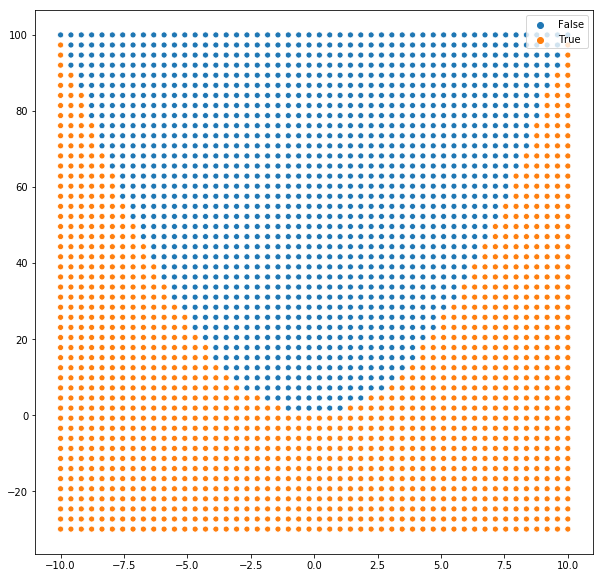

In [262]:
sn.scatterplot(x1, x2, hue=y);

In [209]:
X = np.transpose(np.array((x1, x2)))

Potestuj jakie ustawieniu modelu najlepiej odzwierciedlą funkcję $x^2$

Pozmieniaj liczbę neuronów, optimizer, funkcję straty, learning rate, liczbę epok.

In [257]:
num_epochs = 20
model = Sequential()
model.add(Dense(16, input_shape=(2,), activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [258]:
history = model.fit(X, y, epochs=num_epochs)

Epoch 1/20
2500/2500 [==============================] - 1s 307us/step - loss: 1.5063
Epoch 2/20
2500/2500 [==============================] - 0s 34us/step - loss: 0.4928
Epoch 3/20
2500/2500 [==============================] - 0s 34us/step - loss: 0.4371
Epoch 4/20
2500/2500 [==============================] - 0s 32us/step - loss: 0.3935
Epoch 5/20
2500/2500 [==============================] - 0s 34us/step - loss: 0.3556
Epoch 6/20
2500/2500 [==============================] - 0s 29us/step - loss: 0.3310
Epoch 7/20
2500/2500 [==============================] - 0s 35us/step - loss: 0.3083
Epoch 8/20
2500/2500 [==============================] - 0s 34us/step - loss: 0.2910
Epoch 9/20
2500/2500 [==============================] - 0s 34us/step - loss: 0.2751
Epoch 10/20
2500/2500 [==============================] - 0s 34us/step - loss: 0.2605
Epoch 11/20
2500/2500 [==============================] - 0s 37us/step - loss: 0.2491
Epoch 12/20
2500/2500 [==============================] - 0s 39us/step - l

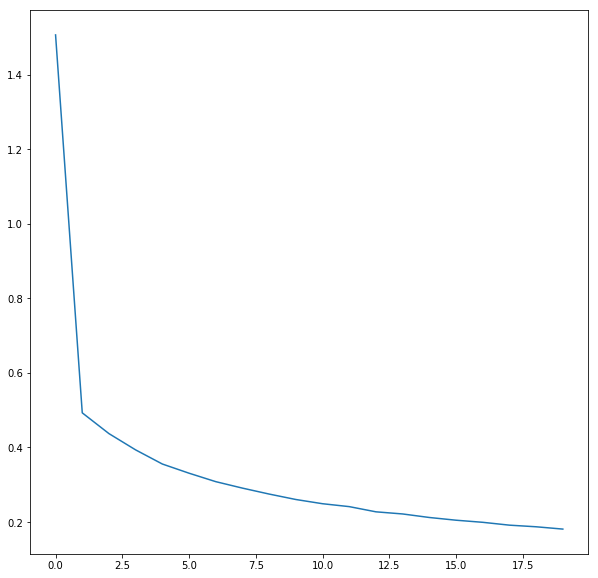

In [264]:
# wykres funkcji straty w kolejnych krokach
sn.lineplot(range(num_epochs), history.history['loss']);

In [260]:
# Tworzenie tablicy mówiącej czy model dobrze określił daną wartość
pred = model.predict(X).squeeze() > 0.5
true_pred = pred == y

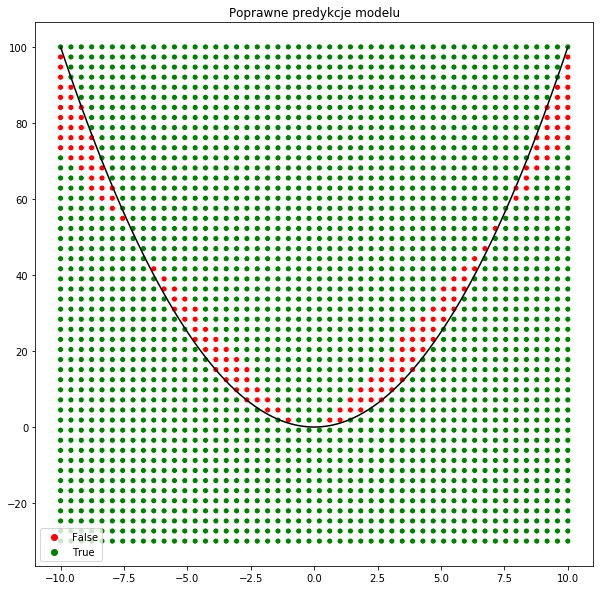

In [263]:
# Wykres punktów, które model dobrze określił i źle (False-niepoprawnie, True-poprawnie)
plt.rcParams['figure.figsize'] = 10, 10
sn.scatterplot(x1, x2, hue=true_pred, alpha=1, palette=['r', 'g'])
x = np.linspace(-10, 10, num= 100)
sn.lineplot(x, (np.power(x, 2)), color='k')
plt.title('Poprawne predykcje modelu');